In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [47]:
df = pd.read_csv("/Users/abigailgarcia/Desktop/4661-DataScience/petfinder-pawpularity-score/train.csv")


In [48]:
feature_cols = ['Subject Focus','Eyes','Face','Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']
label_col = ['Pawpularity']

In [49]:
X = df[feature_cols]
Y = df[label_col]

In [50]:
X= preprocessing.scale(X)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [52]:
my_logreg = LogisticRegression(random_state=2)

my_logreg.fit(X_train, Y_train)

Y_predict_lr = my_logreg.predict(X_test)

score_lr = accuracy_score(Y_test, Y_predict_lr)

print(score_lr)

/Users/abigailgarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.02488231338264963


In [63]:
# Estimating the probability (likelihood) of Each Label: 
Y_predict_prob_lr = my_logreg.predict_proba(X_test)
# This line prints the "estimated likelihood of label=1" for the testing set:

print(Y_predict_prob_lr[:,1])

[0.00610848 0.00602051 0.00712794 ... 0.00712794 0.00535512 0.00712794]


In [78]:

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_prob_lr[:,1], pos_label= 38)

print(fpr)
print(tpr)

[0.         0.00136986 0.00479452 0.00753425 0.00821918 0.0109589
 0.01712329 0.01917808 0.01986301 0.02465753 0.06643836 0.08356164
 0.08493151 0.08835616 0.0890411  0.12054795 0.12123288 0.12260274
 0.12328767 0.12534247 0.1260274  0.13219178 0.13424658 0.13561644
 0.13767123 0.13972603 0.14726027 0.15273973 0.15479452 0.15616438
 0.16849315 0.17123288 0.17534247 0.17671233 0.17876712 0.21369863
 0.21506849 0.21917808 0.22739726 0.22876712 0.22945205 0.23630137
 0.23835616 0.28150685 0.28287671 0.28493151 0.28561644 0.29383562
 0.29520548 0.29931507 0.30068493 0.30136986 0.30205479 0.31164384
 0.3130137  0.31369863 0.70958904 0.71575342 0.71917808 0.71986301
 0.72328767 0.72465753 0.74520548 0.75       0.75205479 0.75273973
 0.75616438 0.7630137  0.79383562 0.79520548 0.79589041 0.79726027
 0.79794521 0.80136986 0.82739726 0.90068493 0.90273973 0.93630137
 0.9390411  0.93972603 0.94109589 0.94178082 0.94520548 0.94657534
 0.94726027 0.95       0.95342466 0.95410959 0.96027397 0.96575

In [79]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.6133688483003551


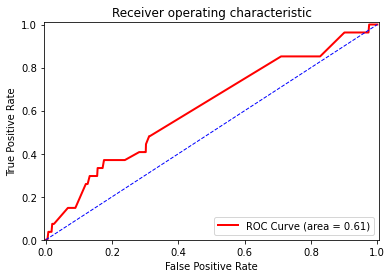

In [76]:
#ROC Curve

# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()